## Foundations of Data Science: Computational Thinking with Python

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 6: Census

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

pd.set_option('max_rows', 8)

In [2]:
data_url = ('http://www2.census.gov/programs-surveys/popest/datasets/'
            
             '2010-2015/national/asrh/nc-est2015-agesex-res.csv')

# Documentation is online at:
# https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2015/nc-est2015-agesex-res.pdf

full = pd.read_csv(data_url)

partial = full.loc[:, ['SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2015']]
partial.rename(columns={'POPESTIMATE2010':'2010', 'POPESTIMATE2015':'2015'}, inplace=True)

partial

# Not sure how to replicate NumberFormatter from the datascience module
# mapping integers to formatted strings works, but changes the dtype
# for year in ['2010', '2015']:
#    partial[year] = partial[year].map(lambda srs: '{:,}'.format(srs))

,SEX,AGE,2010,2015
0,0,0,3951330,3978038
1,0,1,3957888,3968564
2,0,2,4090862,3966583
3,0,3,4111920,3974061
...,...,...,...,...
302,2,98,37532,47272
303,2,99,26074,34064
304,2,100,45058,61886
305,2,999,157258820,163189523


In [3]:
partial['Change'] = partial['2015'] - partial['2010']
partial['Growth'] = partial['Change'] / partial['2010']
partial

,SEX,AGE,2010,2015,Change,Growth
0,0,0,3951330,3978038,26708,0.006759
1,0,1,3957888,3968564,10676,0.002697
2,0,2,4090862,3966583,-124279,-0.030380
3,0,3,4111920,3974061,-137859,-0.033527
...,...,...,...,...,...,...
302,2,98,37532,47272,9740,0.259512
303,2,99,26074,34064,7990,0.306436
304,2,100,45058,61886,16828,0.373474
305,2,999,157258820,163189523,5930703,0.037713


In [6]:
partial['Annual_growth'] = (partial['Growth'] + 1) ** (1 / 5) - 1
partial

,SEX,AGE,2010,2015,Change,Growth,Annual_growth
0,0,0,3951330,3978038,26708,0.006759,0.001348
1,0,1,3957888,3968564,10676,0.002697,0.000539
2,0,2,4090862,3966583,-124279,-0.030380,-0.006151
3,0,3,4111920,3974061,-137859,-0.033527,-0.006797
...,...,...,...,...,...,...,...
302,2,98,37532,47272,9740,0.259512,0.047226
303,2,99,26074,34064,7990,0.306436,0.054915
304,2,100,45058,61886,16828,0.373474,0.065526
305,2,999,157258820,163189523,5930703,0.037713,0.007431


In [7]:
partial.sort_values('Change', ascending=False)

,SEX,AGE,2010,2015,Change,Growth,Annual_growth
101,0,999,309346863,321418820,12071957,0.039024,0.007686
203,1,999,152088043,158229297,6141254,0.040380,0.007949
305,2,999,157258820,163189523,5930703,0.037713,0.007431
68,0,68,2359816,3436357,1076541,0.456197,0.078063
...,...,...,...,...,...,...,...
49,0,49,4599098,4152552,-446546,-0.097094,-0.020220
39,0,39,4324463,3870862,-453601,-0.104892,-0.021918
48,0,48,4534663,4077689,-456974,-0.100774,-0.021020
47,0,47,4535473,4073685,-461788,-0.101817,-0.021247


In [61]:
us_pop_2015 = partial.loc[(partial['AGE'] < 999) & (partial['SEX'] != 0)].copy()
us_pop_2015.drop(['2010'], axis='columns', inplace=True)
us_pop_2015

,SEX,AGE,2015,Change,Growth,Annual_growth
102,1,0,2035134,16714,0.008281,0.001651
103,1,1,2029295,8963,0.004436,0.000886
104,1,2,2026604,-62081,-0.029723,-0.006016
105,1,3,2030644,-70628,-0.033612,-0.006815
...,...,...,...,...,...,...
301,2,97,69285,15167,0.280258,0.050653
302,2,98,47272,9740,0.259512,0.047226
303,2,99,34064,7990,0.306436,0.054915
304,2,100,61886,16828,0.373474,0.065526


,age,females,males
0,0,1942904,2035134
1,1,1939269,2029295
2,2,1939979,2026604
3,3,1943417,2030644
...,...,...,...
97,97,69285,23092
98,98,47272,14719
99,99,34064,9577
100,100,61886,15088


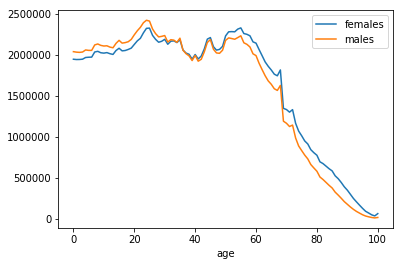

In [100]:
# Age males females
sex_table = pd.DataFrame({'age': us_pop_2015.loc[us_pop_2015.SEX == 1].loc[:,'AGE'].values,
                          'males': us_pop_2015.loc[us_pop_2015.SEX == 1].loc[:,'2015'].values,
                          'females': us_pop_2015.loc[us_pop_2015.SEX == 2].loc[:,'2015'].values})
display(sex_table)

#sex_table.plot.line('age', ['males', 'females'])  # Throws warning but works fine
sex_table.plot.line('age')
plt.show()

In [51]:
# Aside - Returning a view vs. a copy
#   Should probably look into this more later 
#    http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
#
#   but in short, using loc or iloc with multi-indexing is prefered
#   though that's not the problem here
#   
#   expliciting copying a slice seems to be enough to indicate you know it's not a view and avoid the warning

sometable = pd.DataFrame({'A':[1,2], 'B':[2,3]})
somecopy = sometable.loc[sometable.A != 2]
somecopy = sometable.loc[sometable.A != 2].copy()  # Explicit copy avoids Warning
somecopy = sometable.loc[sometable.loc[:, 'A'] != 2]
somecopy
#sometable.drop('B', axis='columns', inplace=True)
somecopy.drop('B', axis='columns', inplace=True)

/home/paul/Software/anaconda2/envs/ds36_env/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
